# Latihan SKLearn K-means Clustering

Pada latihan kali ini, Anda akan belajar membuat model unsupervised learning dengan teknik K-Means Clustering.

## Dependencies

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Konversi dataset menjadi dataframe

In [3]:
mall_customers_df = pd.read_csv('Mall_Customers.csv')
mall_customers_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 2. Preprocessing Data

In [4]:
# Ubah nama kolom agar seragam
mall_customers_df = mall_customers_df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

# Ubah data kategorik menjadi data numerik
mall_customers_df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

mall_customers_df

C:\Users\divap\AppData\Local\Temp\ipykernel_14180\4113771275.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mall_customers_df['gender'].replace(['Female', 'Male'], [0,1], inplace=True)
C:\Users\divap\AppData\Local\Temp\ipykernel_14180\4113771275.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


## 3. Drop 'CustomerID' & 'gender'

In [6]:
# Drop kolom CustomerID dan gender
X = mall_customers_df.drop([
    'CustomerID', 'gender'], axis=1  # axis=1 artinya drop kolom, axis=0 artinya drop baris
)

In [15]:
X

,age,annual_income,spending_score,Labels
0,19,15,39,3
1,21,15,81,0
2,20,16,6,3
3,23,16,77,0
4,31,17,40,3
...,...,...,...,...
195,35,120,79,1
196,45,126,28,2
197,32,126,74,1
198,32,137,18,2


## 4. Latih model

In [16]:
# Membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

Menentukan nilai K yang optimal dengan metode Elbow. Library K-means dari SKLearn menyediakan fungsi untuk menghitung inersia dari K-Means dengan jumlah K tertentu. Di sini kita akan membuat list yang berisi inersia dari nilai K antara 1 sampai 11.

Text(0, 0.5, 'Inertia')

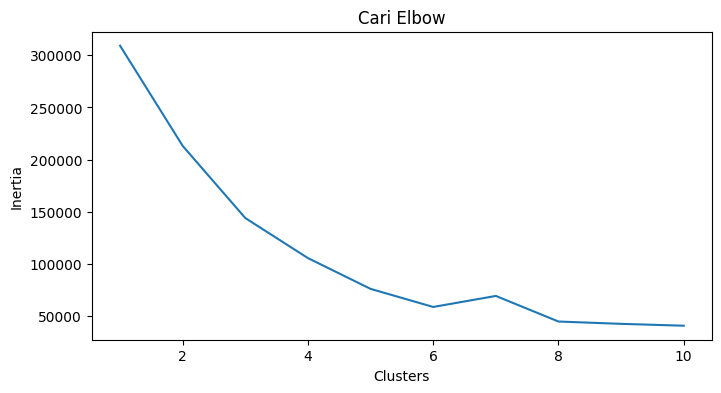

In [17]:
# Plot inertia Elbow Method
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [20]:
# Membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# Menambahkan kolom label pada dataset
X['Labels'] = km6.labels_

C:\Users\divap\AppData\Local\Temp\ipykernel_14180\2216628653.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],


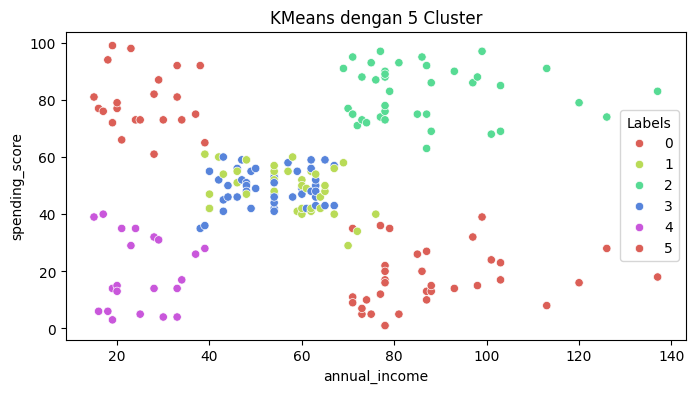

In [21]:
# Membuat plot KMeans dengan 5 cluster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['annual_income'], y=X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()